# Central Limit Theory

In [8]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# create a population and take samples
population_list = []

for _ in range(100000):
  population_list.append(random.randint(1, 100))

# invert the list into pandas Series to be able to use .sample() method
population_series = pd.Series(population_list)

## sample distributions
to study the effect to prove the central limit theory

In [10]:
def sample_dist(num_samples, sample_size, population_series):
  ratio_sample = sample_size/num_samples
  sample_means = []

  for _ in range(num_samples):
      sample = population_series.sample(n=sample_size, replace=True)
      sample_mean = sample.mean()
      sample_means.append(sample_mean)

  sns.displot(kind = 'hist',
              data = sample_means,
              bins = 50)
  plt.title(f"Distribution of the sample means of {sample_size} samples {num_samples} times")
  plt.xlabel("Mean age of the sample")
  plt.ylabel("Frequency")
  plt.show()

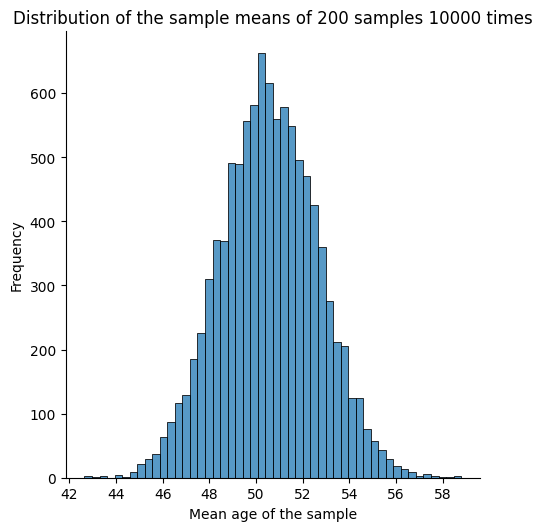

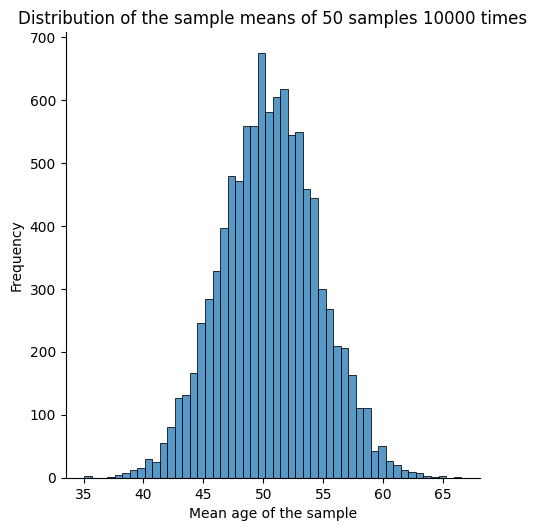

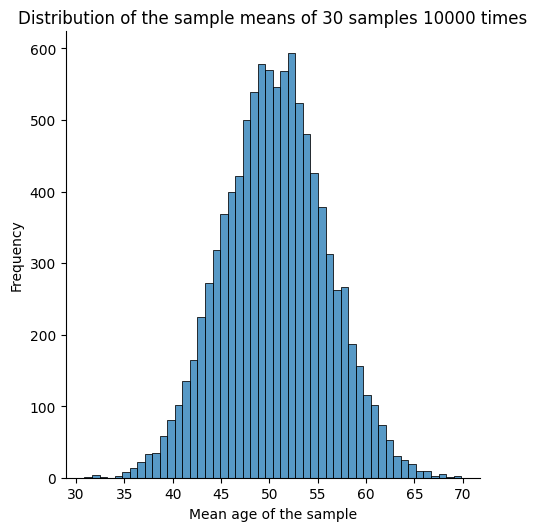

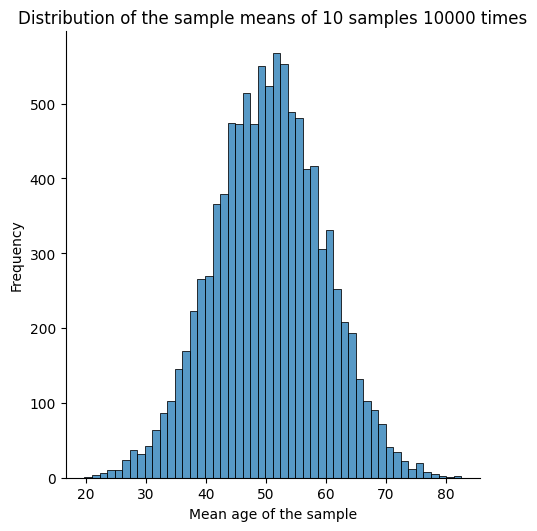

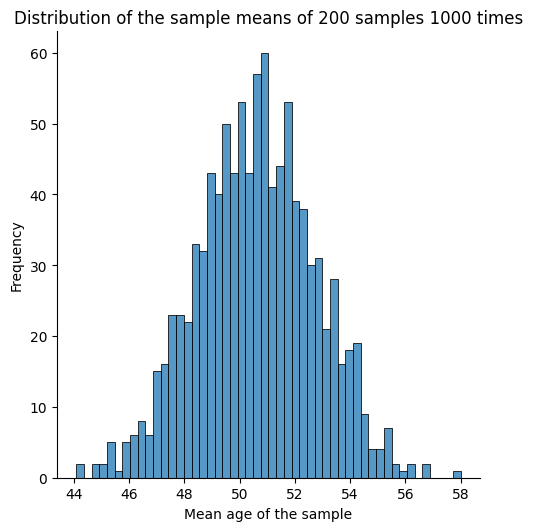

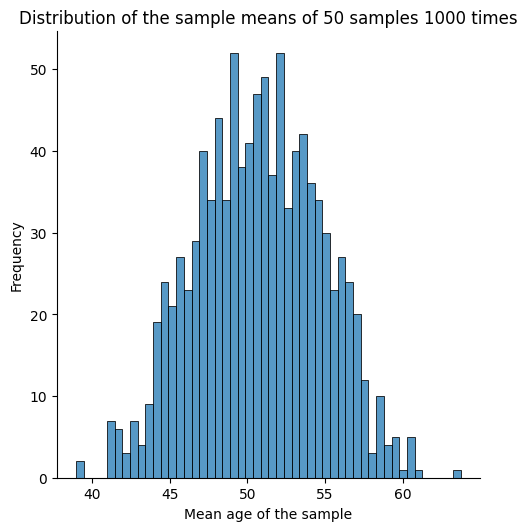

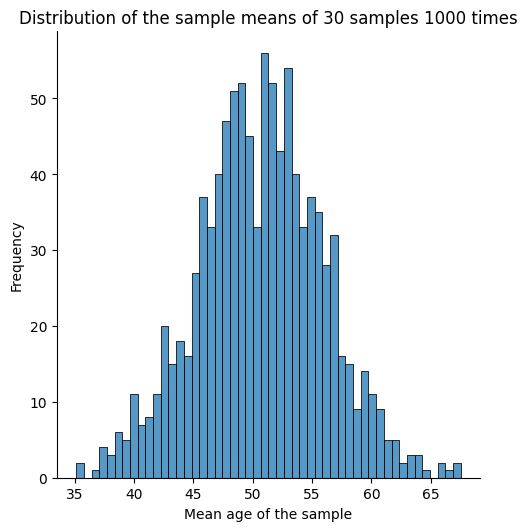

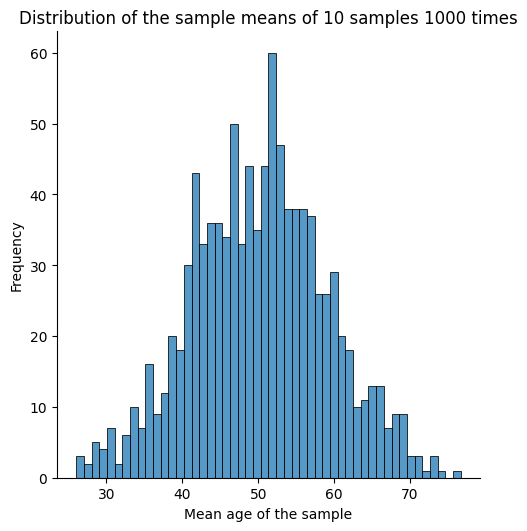

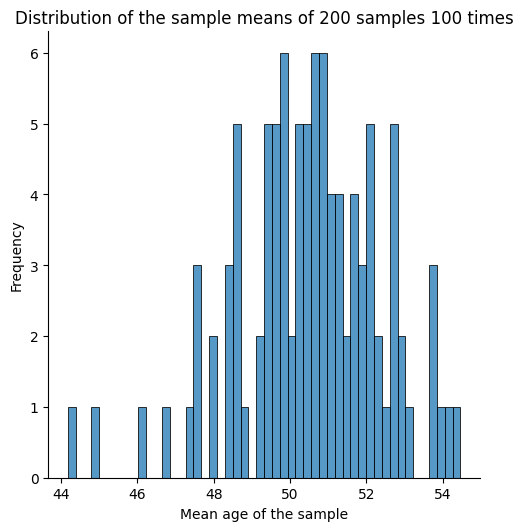

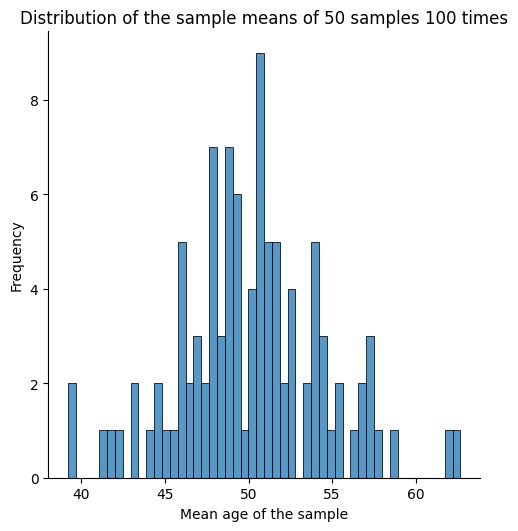

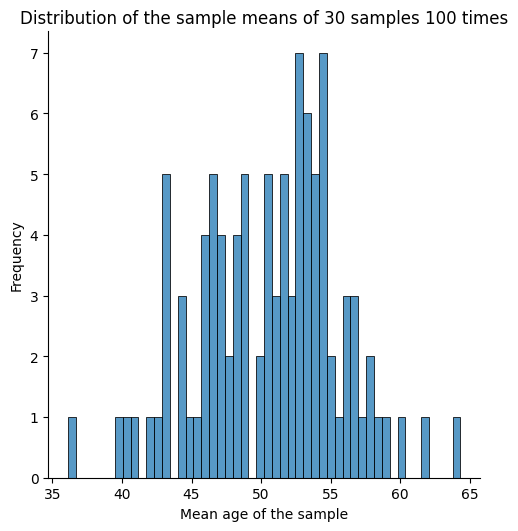

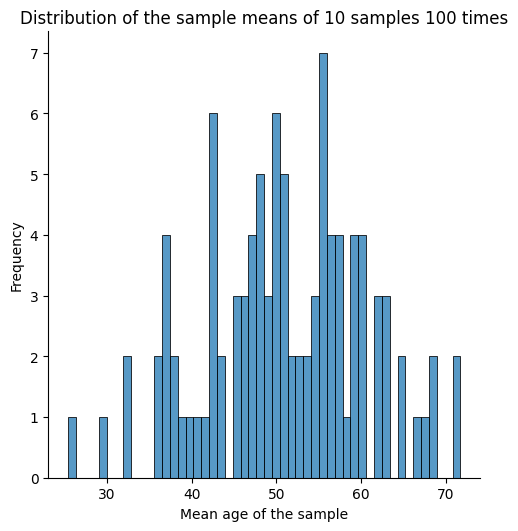

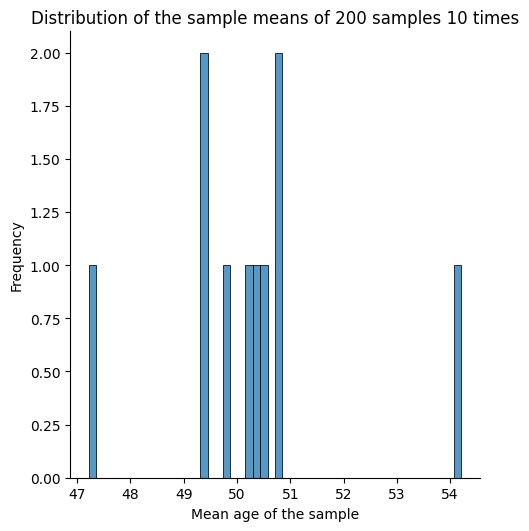

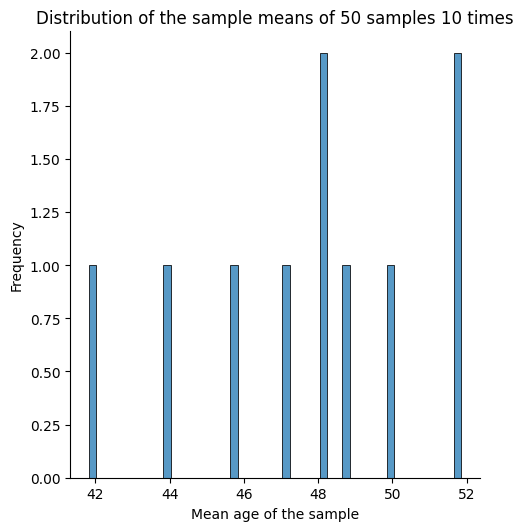

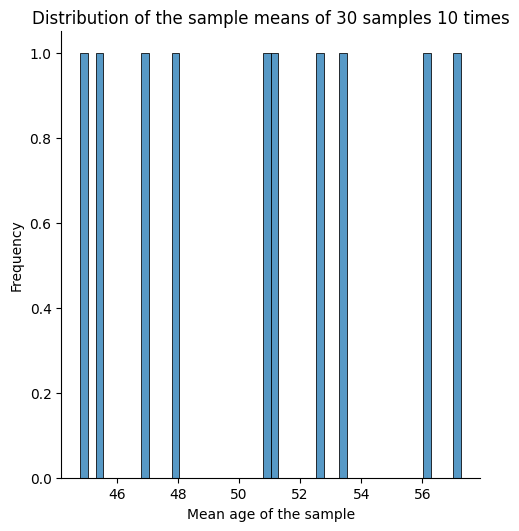

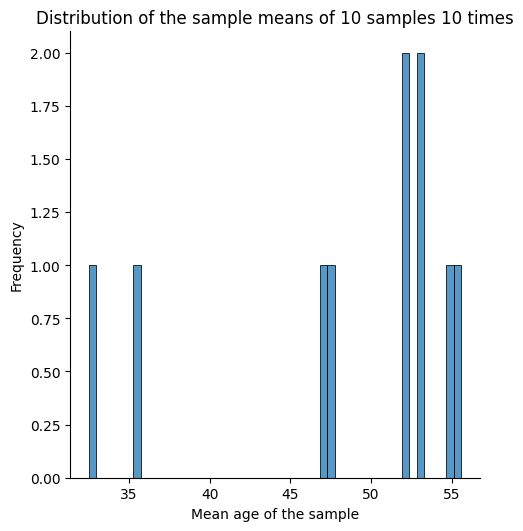

In [11]:
for num_samples in [10000, 1000, 100, 10]:
  for sample_size in [200, 50, 30, 10]:
    sample_dist(num_samples, sample_size, population_series)

In [12]:
population_list_small = []

for _ in range(1000):
  population_list_small.append(random.randint(1, 100))

pop_small_series = pd.Series(population_list_small)

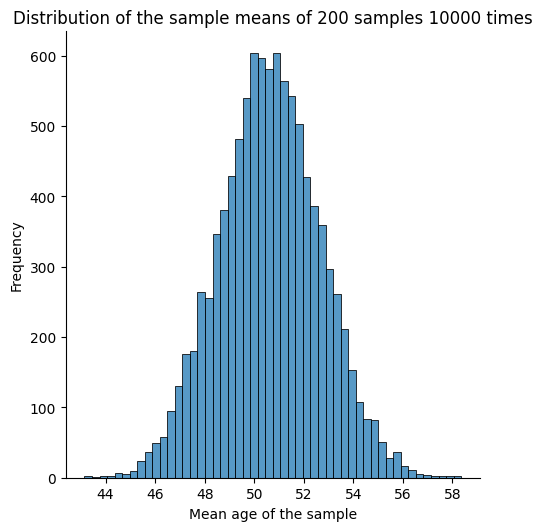

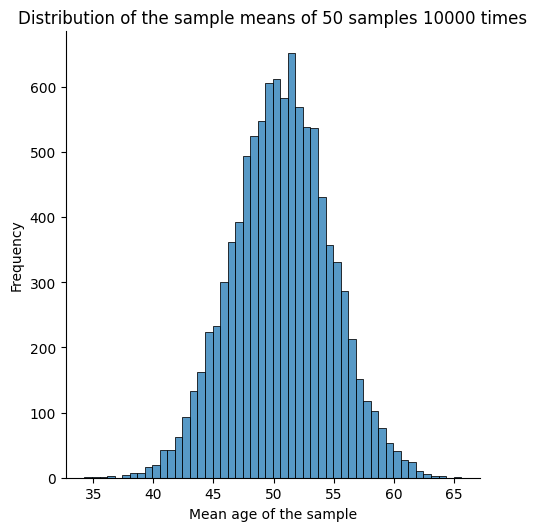

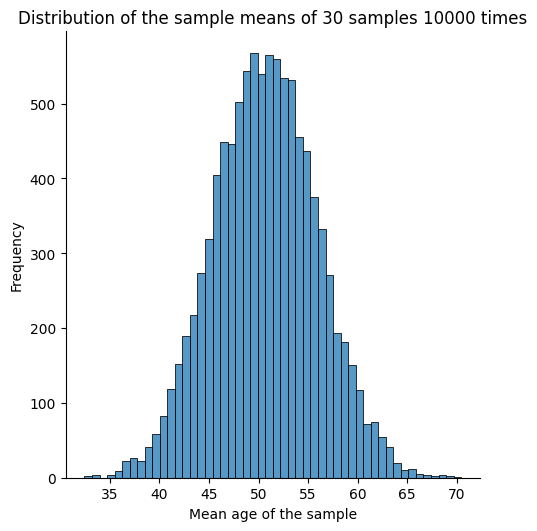

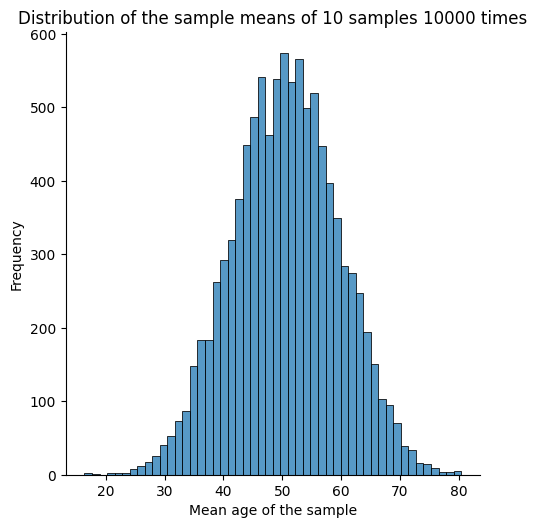

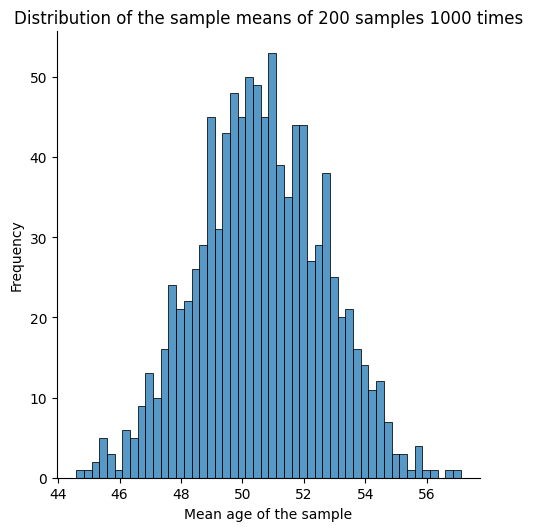

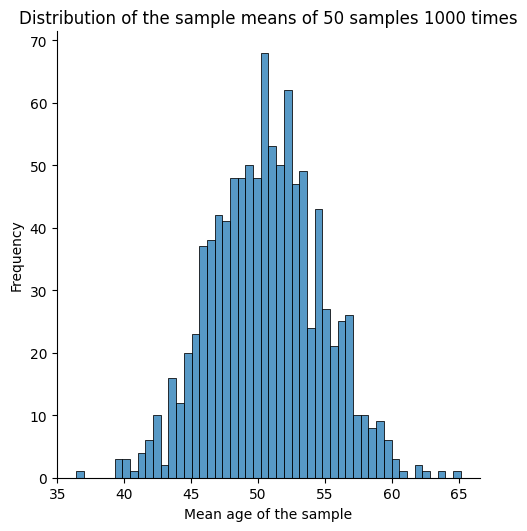

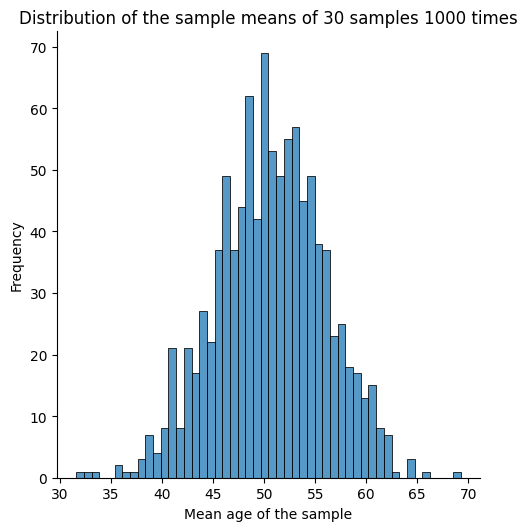

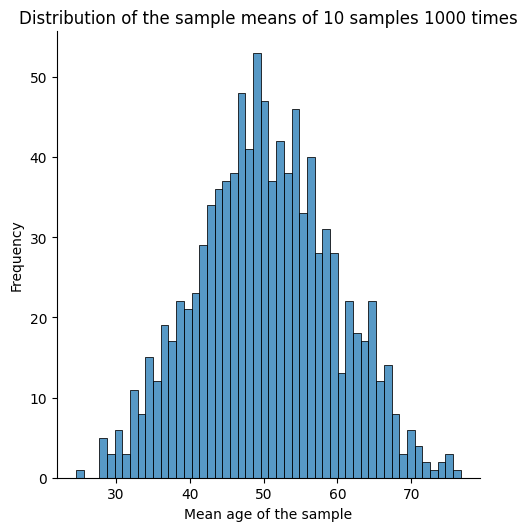

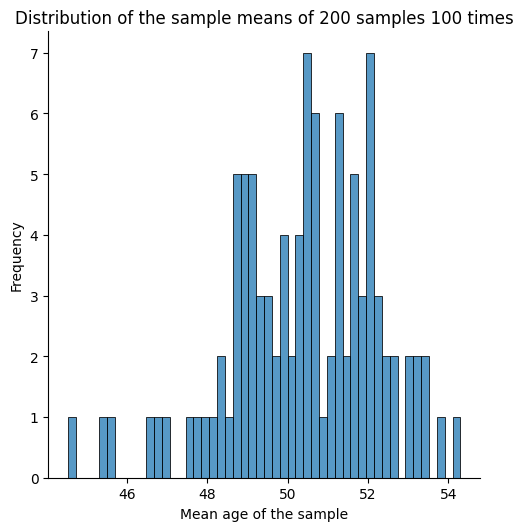

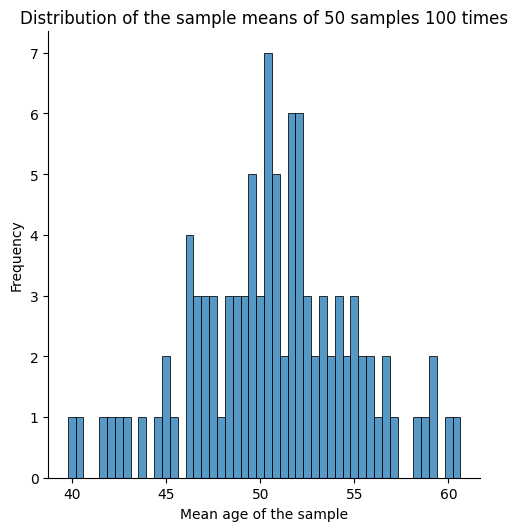

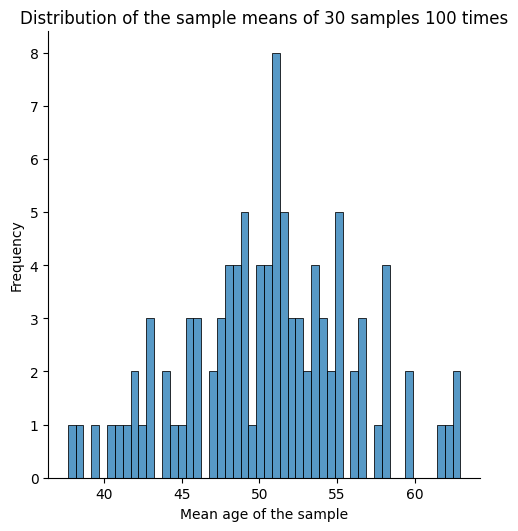

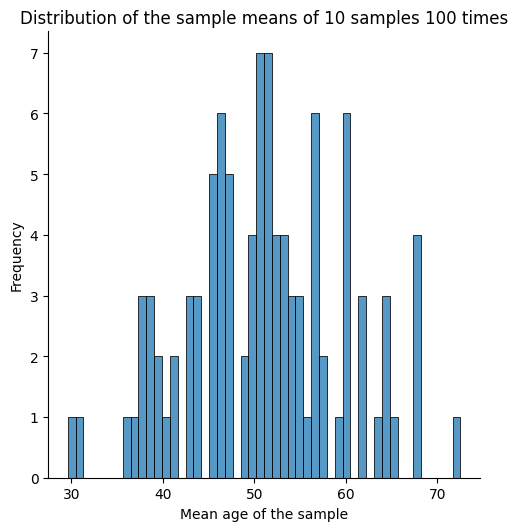

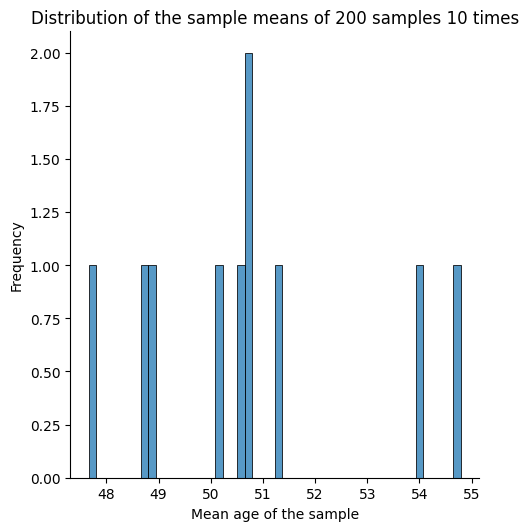

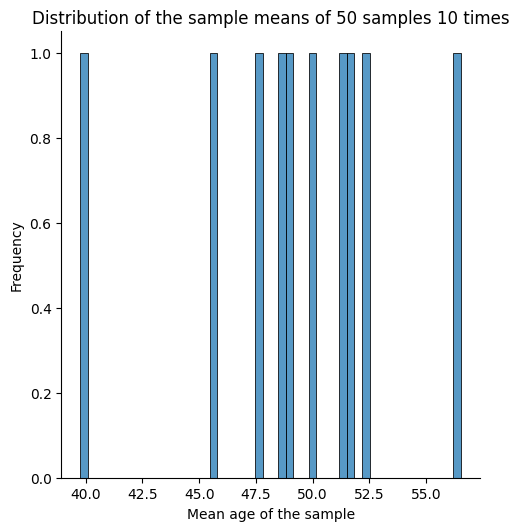

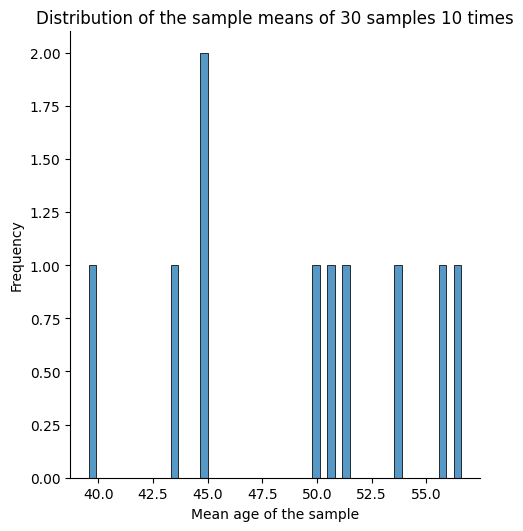

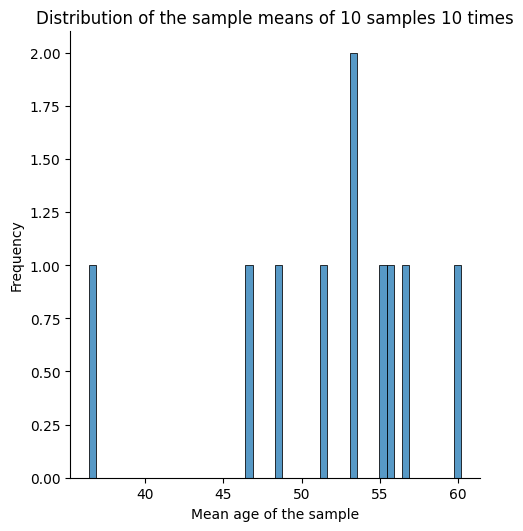

In [13]:
for num_samples in [10000, 1000, 100, 10]:
  for sample_size in [200, 50, 30, 10]:
    sample_dist(num_samples, sample_size, pop_small_series)

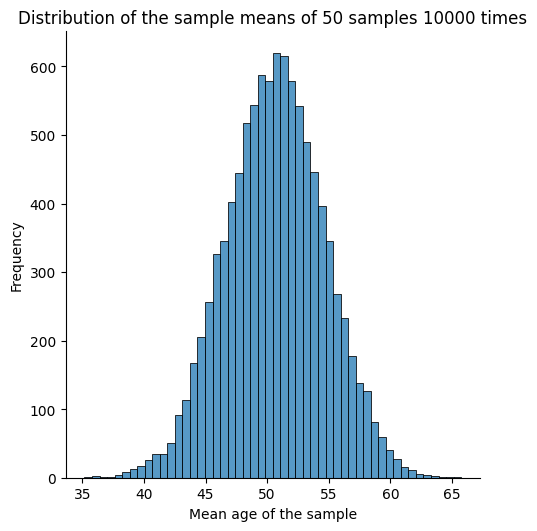

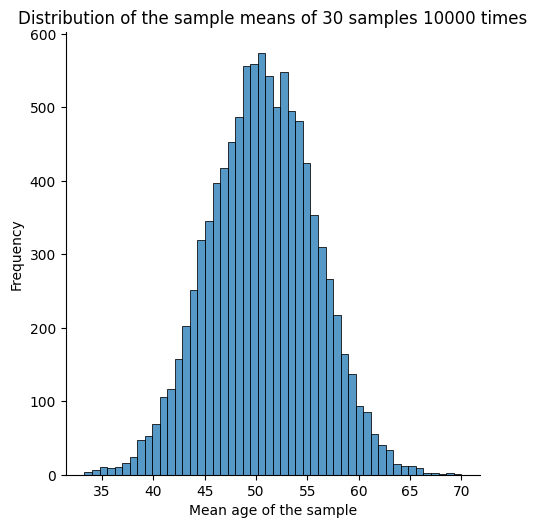

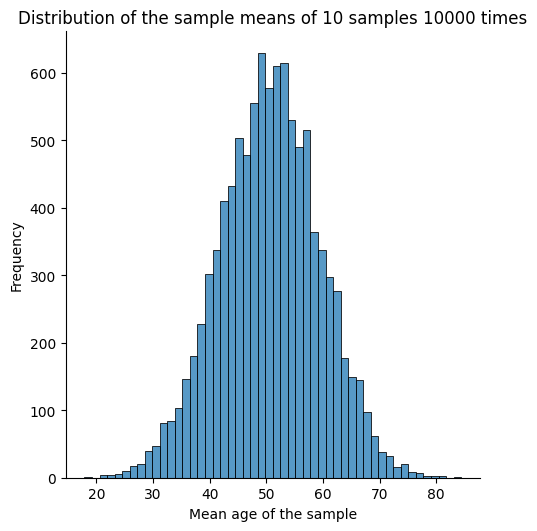

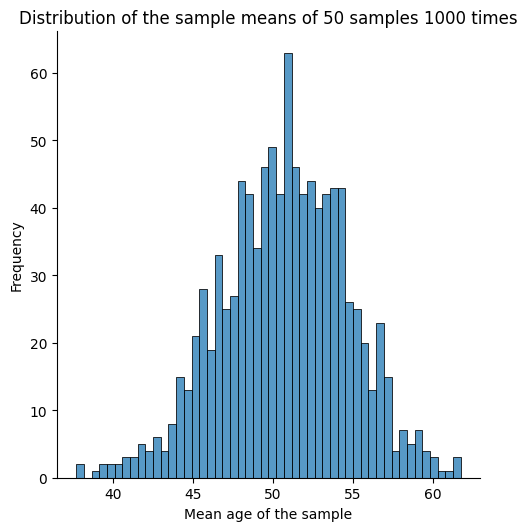

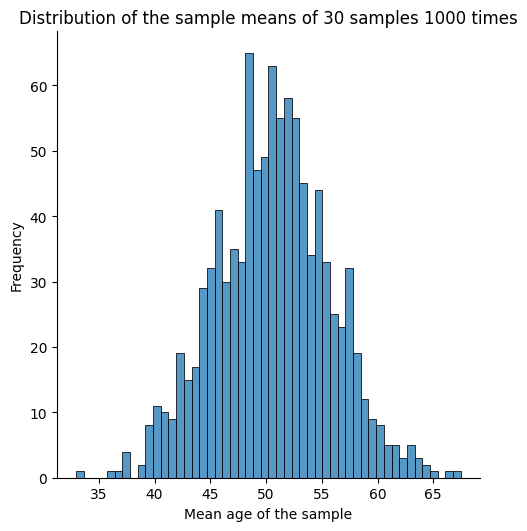

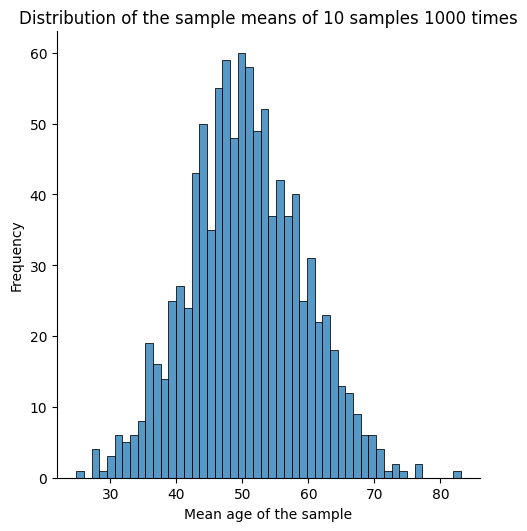

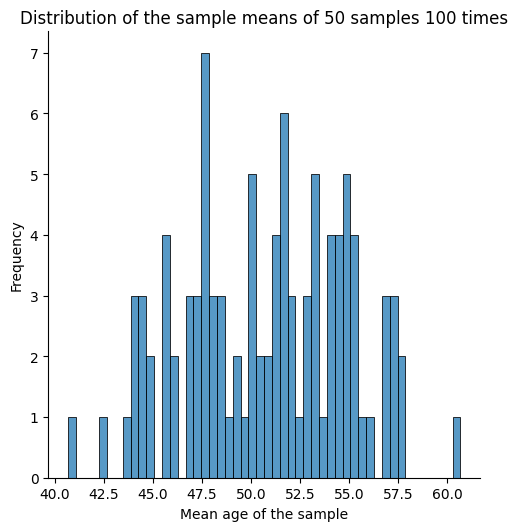

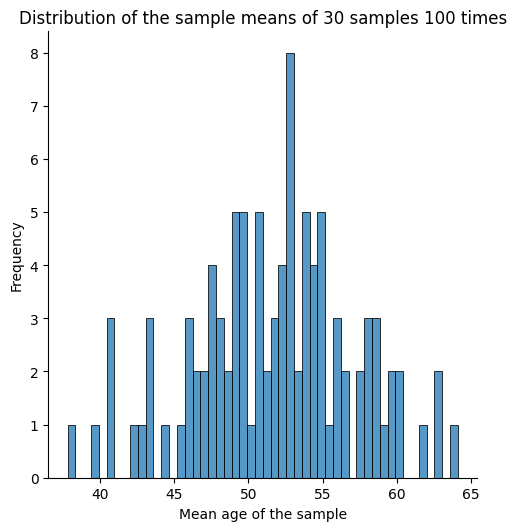

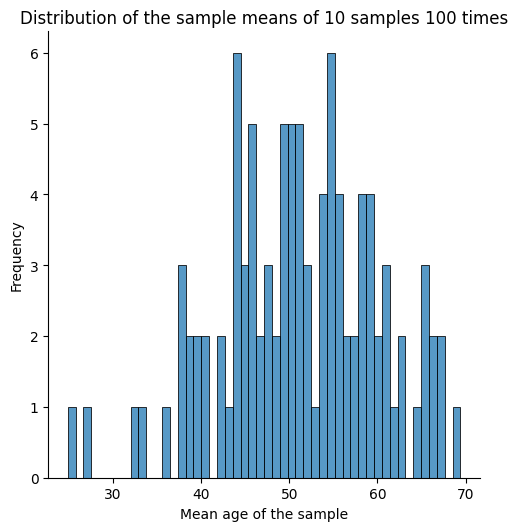

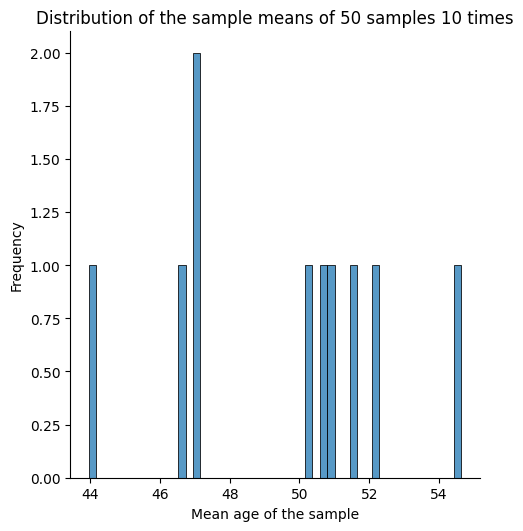

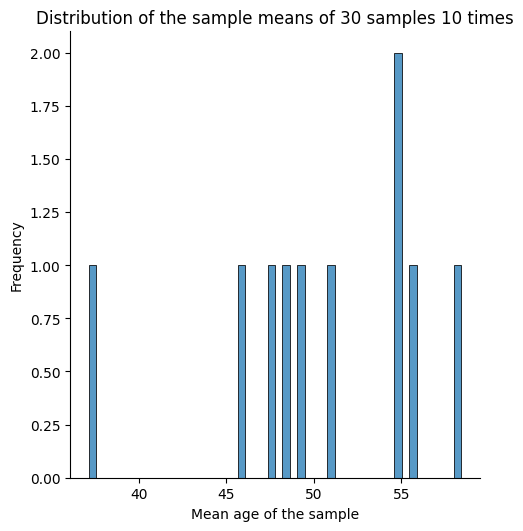

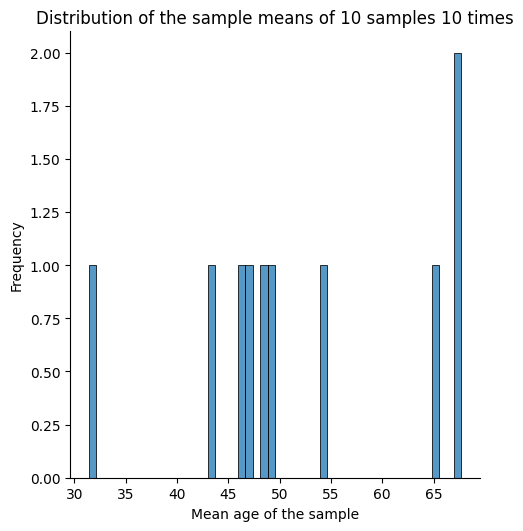

In [14]:
population_list_smallest = []

for _ in range(100):
  population_list_smallest.append(random.randint(1, 100))

pop_smallest_series = pd.Series(population_list_smallest)

for num_samples in [10000, 1000, 100, 10]:
  for sample_size in [50, 30, 10]:
    sample_dist(num_samples, sample_size, pop_smallest_series)

explore a **bimodal distribution** with two distinct peaks

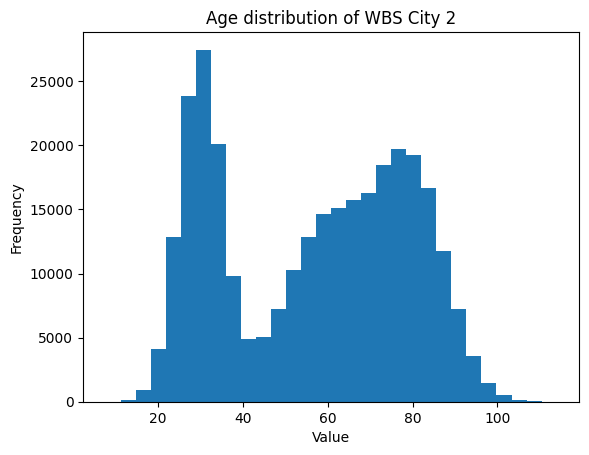

In [15]:
# Set the number of data points per mode
num_points = 100000

# Define the parameters for each mode (mean and standard deviation)
modes = [
    {'mean': 30, 'std_dev': 5},
    {'mean': 60, 'std_dev': 10},
    {'mean': 80, 'std_dev': 8}
]

# Generate random numbers for each mode and concatenate them
ages = np.concatenate([np.random.normal(mode['mean'], mode['std_dev'], num_points) for mode in modes])

# Create a histogram to visualise the distribution
plt.hist(ages, bins=30)
plt.title("Age distribution of WBS City 2")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [17]:
sample_size = 200
sample_times = 10000
sample_means = []

for time in range(sample_times):
  first_sample = population_series.sample(sample_size, replace=True)
  first_sample_mean = first_sample.mean()
  sample_means.append(first_sample_mean)

sample_means

[50.355,
 50.21,
 53.39,
 51.815,
 50.705,
 48.54,
 54.67,
 53.055,
 50.375,
 51.64,
 55.37,
 51.97,
 50.51,
 49.64,
 49.965,
 50.805,
 51.115,
 53.88,
 48.885,
 51.485,
 52.63,
 49.025,
 52.66,
 48.065,
 51.635,
 50.305,
 48.105,
 49.87,
 51.25,
 51.37,
 52.27,
 52.62,
 53.695,
 48.295,
 48.39,
 55.245,
 47.44,
 52.67,
 51.985,
 50.99,
 49.95,
 51.05,
 49.015,
 48.045,
 47.99,
 51.02,
 50.4,
 50.115,
 51.745,
 50.115,
 52.42,
 50.905,
 48.35,
 48.17,
 47.1,
 47.46,
 50.93,
 51.545,
 50.24,
 52.33,
 53.885,
 50.655,
 52.52,
 51.885,
 52.365,
 48.99,
 49.045,
 53.195,
 49.305,
 48.2,
 50.575,
 50.46,
 54.695,
 52.63,
 52.77,
 53.25,
 52.12,
 50.285,
 49.705,
 52.965,
 51.955,
 48.66,
 54.295,
 47.78,
 52.71,
 51.235,
 50.135,
 47.85,
 49.39,
 48.445,
 52.26,
 48.44,
 49.935,
 49.35,
 50.09,
 50.43,
 52.55,
 50.54,
 49.315,
 48.255,
 54.025,
 50.5,
 51.28,
 48.89,
 45.75,
 52.38,
 50.175,
 48.545,
 47.565,
 50.175,
 47.83,
 50.605,
 48.785,
 52.625,
 47.545,
 51.565,
 49.975,
 52.23,
 48

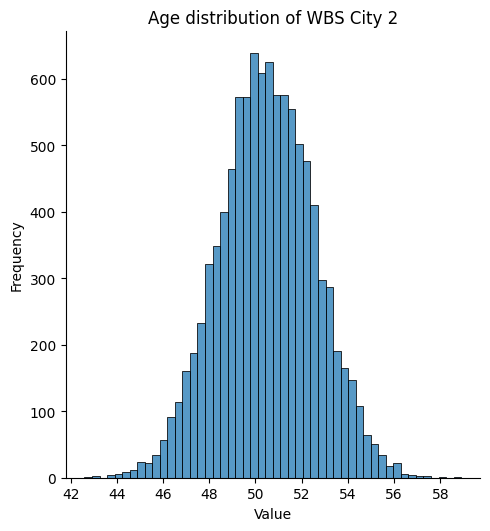

In [18]:
# Set the number of data points per mode
num_points = 100000

# Define the parameters for each mode (mean and standard deviation)
modes = [
    {'mean': 30, 'std_dev': 5},
    {'mean': 60, 'std_dev': 10},
    {'mean': 80, 'std_dev': 8}
]

# Generate random numbers for each mode and concatenate them
ages = np.concatenate([np.random.normal(mode['mean'], mode['std_dev'], num_points) for mode in modes])

# Create a histogram to visualise the distribution
#plt.hist(ages, bins=30)
sns.displot(kind = 'hist',
              data = sample_means,
              bins = 50)
plt.title("Age distribution of WBS City 2")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [19]:
  ages = pd.Series(ages)

In [20]:
def distribution_fn(age_sample_size):
  """

  Args:
    age_sample_size:
  """
  #age_sample_size = 250
  age_sample_means = []
  age_sample_std = []
  num_age_sample = 10000

  for n in range(num_age_sample):
    age_sample = ages.sample(n=age_sample_size, replace=True)
    n_age_sample_mean = age_sample.mean()
    age_sample_means.append(n_age_sample_mean)
    n_age_sample_std = age_sample.std()
    age_sample_std.append(n_age_sample_std)

  sns.displot(kind = 'hist',
                data = age_sample_means,
                bins = 50)
  plt.title(f"Mean distribution of {age_sample_size} samples")
  plt.xlabel("Value")
  plt.ylabel("Frequency")
  plt.show()

  sns.displot(kind = 'hist',
                data = age_sample_std,
                bins = 50)
  plt.title(f"Standard Error distribution of {age_sample_size} samples")
  plt.xlabel("Value")
  plt.ylabel("Frequency")
  plt.show()

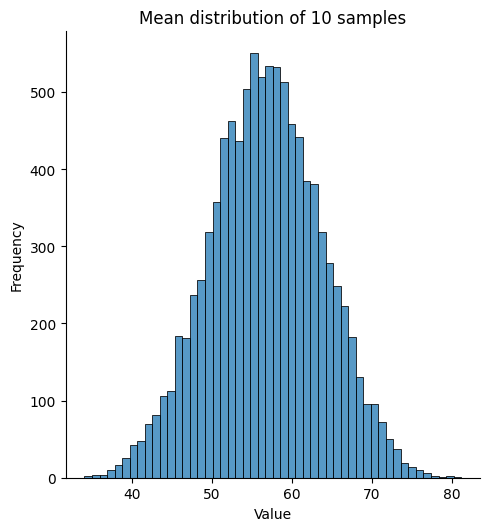

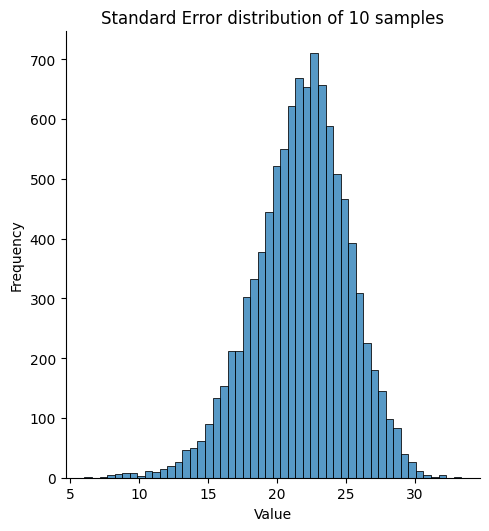

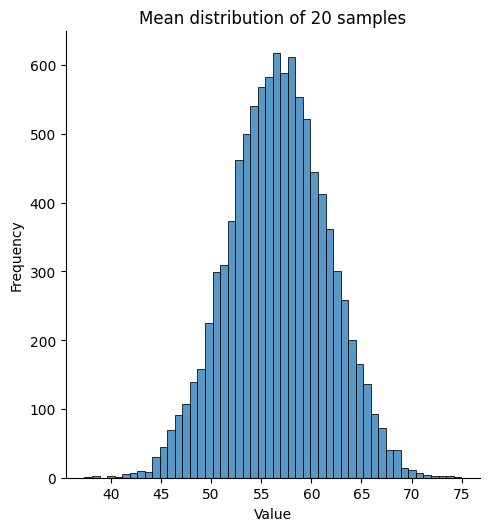

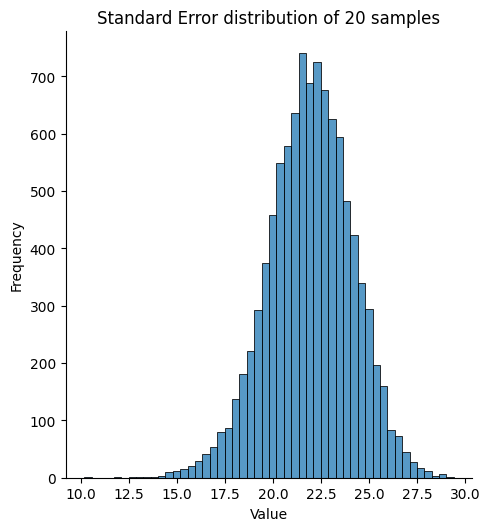

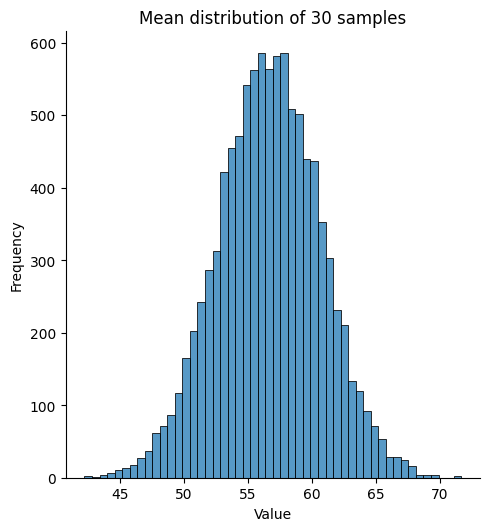

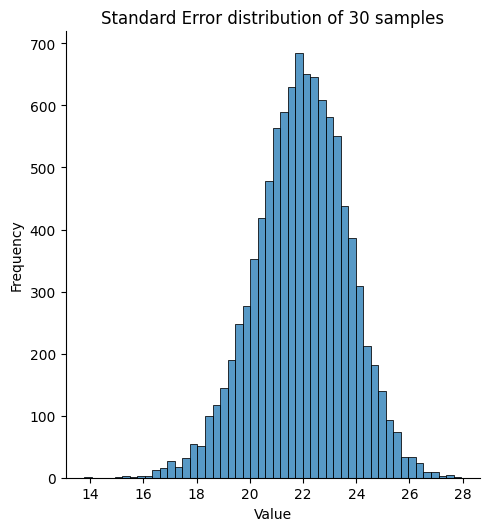

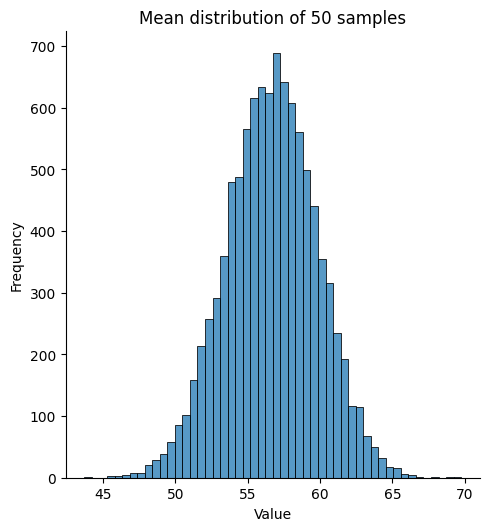

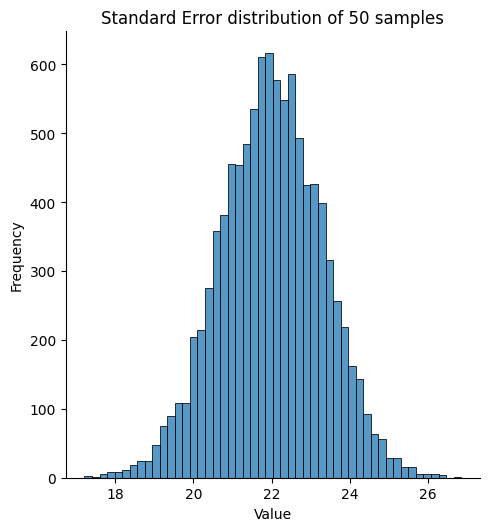

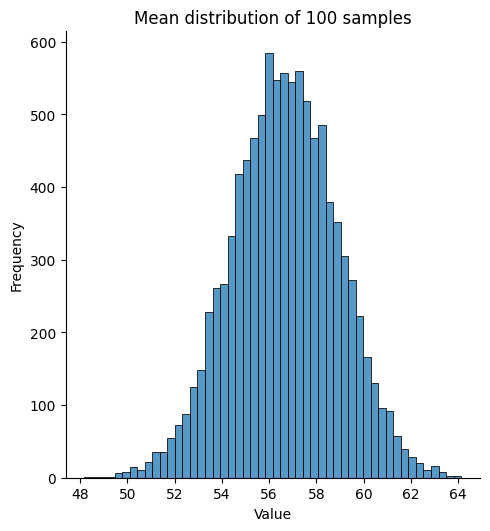

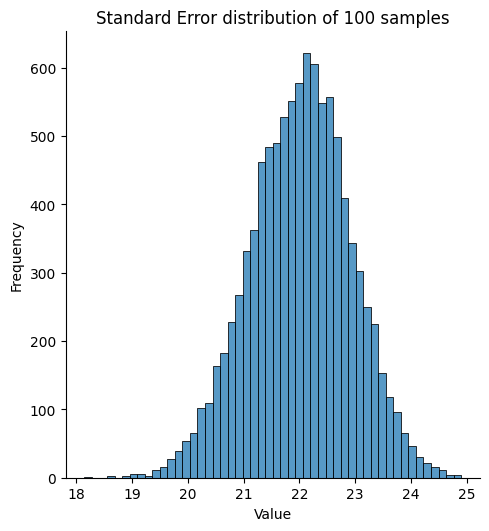

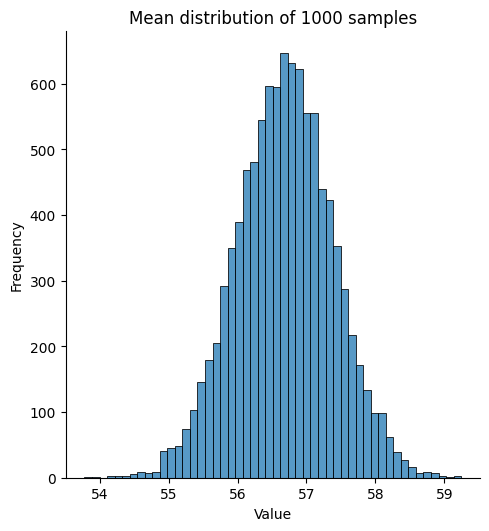

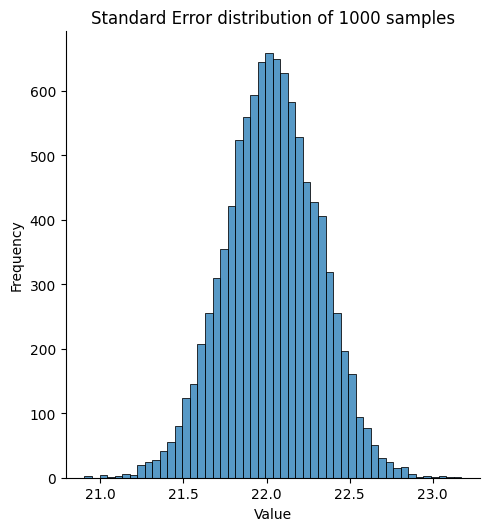

In [21]:
size_of_sample = [10, 20, 30, 50, 100, 1000]
for i in size_of_sample:
  distribution_fn(i)

The central limit theory is still proven TRUE

___________________________________________________________________________

# 1 Sample T Test

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, ttest_1samp

manual approach

In [23]:
squirrels_2 = pd.Series([0.7 , 1.13, 0.64, 1.02, 1.19, 0.84, 0.67, 1.06, 0.74,
                         0.74, 1.07, 1.08, 1.02, 0.86, 0.76, 1.06, 0.81, 1.23,
                         1.06, 0.82, 1.09, 1.04, 1.06, 0.86, 1.27, 0.82, 0.54,
                         0.68, 1.11, 0.72, 0.73, 0.6 , 0.94, 1.26, 0.94, 1.19,
                         1.03, 1.01, 0.85, 0.59, 0.88, 0.49, 1.06, 0.76, 1.14,
                         0.47, 0.63, 0.92, 0.65, 1.42, 1.12, 1.03, 0.71])

**State the Null Hypothesis**: <br>
H0 = the average weight of squirrels is 1 kg

Ha = the average weight of squirrels is NOT 1 kg (could be more, could be less)

In [24]:
# set Alpha
alpha_2 = 0.01

# calculate the test result
x_bar_2 = squirrels_2.mean()

s_2 = squirrels_2.std()

sample_size_2 = squirrels_2.count()

se_2 = s_2/(sample_size_2**(1/2))

t_score_2 = (x_bar_2 - 1)/se_2
t_score_2

-3.0222502237975024

In [25]:
#Setting the stat conditions
from scipy.stats import t
degree_freedom = sample_size_2 - 1    #degree of freedom
alpha_sq_2 = 0.01            #significance level (99% confidence)

#Calculate critical value
critical_value_2_tailed = t.ppf(1-alpha_sq_2/2, degree_freedom)

critical_value_2_tailed = t.ppf(1-0.01/2, 52)
critical_value_2_tailed

2.6737336306472184

In [26]:
sample_size_2 = squirrels_2.count()
degree_freedom = sample_size_2 - 1    #degree of freedom

alpha_2 = 0.01  #Select significant level
x_bar_2 = squirrels_2.mean()  #calculate sample mean
s_2 = squirrels_2.std()     #calculate  sample std
se_2 = s_2/(sample_size_2**(1/2))   #calculate standard error
t_score_2 = (x_bar_2 - 1)/se_2 #calculate sample t-score

#Calculate critical value
critical_value_2_tailed = t.ppf(1-alpha_2/2, degree_freedom)

#Interpret the result: compare t-score to critical value (point)
if abs(t_score_2) > critical_value_2_tailed:
  print("Reject the null hypothesis: the average weight is NOT 1 kg")
else:
  print("Do not reject the null hypothesis")

Reject the null hypothesis: the average weight is NOT 1 kg


Code approach

In [27]:
wbscs_students = [172, 155, 144, 112, 79, 132, 126, 184, 145, 155, 65, 73,
 56, 156, 117, 213, 143, 86, 86, 197, 54, 195, 186, 108,
 76, 191, 54, 115, 106, 173, 91, 95, 144, 94, 135, 116,
 182, 144, 127, 216, 71, 200, 182, 71, 129]

In [28]:
wbscs_students = pd.Series(wbscs_students)
wbscs_students.mean()

130.0222222222222

In [29]:
tscore_wbs, pvalue_wbs = ttest_1samp(a = wbscs_students, popmean= 1, alternative='two-sided')

In [30]:
alpha_wbs = 0.01
wbscs_students = pd.Series(wbscs_students)

#calculate p-value by code
tscore_wbs, pvalue_wbs = ttest_1samp(a = wbscs_students, popmean= 100, alternative='greater')

#interpret the result: compare p-value to significant level (area)
if pvalue_wbs < alpha_wbs:
  print("Reject the null hypothesis: the average 130 IQ WBS students is potentially higher than average people (100 IQ)")
else:
  print("Do not reject the null hypothesis")

Reject the null hypothesis: the average 130 IQ WBS students is potentially higher than average people (100 IQ)


___________________________________________________________________________

# Chi Square test

You have tested 4 versions A, B, C and D of the "SHOP NOW" button on Eniac's website.<br>

After the experiment is complete with 1500 visits each, these are the results:<br>

Version A: 134 clicks, 1500 visits.<br>
Version B: 102 clicks, 1500 visits.<br>
Version C: 78 clicks, 1500 visits.<br>
Version D: 129 clicks, 1500 visits.<br>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

State the Null Hypothesis <br>
Null Hypothesis ( H0 ): The click rate on each website (A, B, C and D) is equal.

Alternative Hypothesis ( HA ): At least one of the websites has a significantly different click rate compared to the others, either better or worse.

In [32]:
# define Alpha
en_alpha = 0.05

In [33]:
shop_now = [134, 102, 78, 129]
no_shop_now = [1500 - x for x in shop_now]

eniac_results = pd.DataFrame([shop_now, no_shop_now],
                             columns = ['A', 'B', 'C', 'D'],
                             index = ['Click Shop Now', 'No Click'])
eniac_results

,A,B,C,D
Click Shop Now,134,102,78,129
No Click,1366,1398,1422,1371


In [34]:
# calculate the test result
en_chi_sq, en_p_value, en_df, en_expected_values = chi2_contingency(eniac_results)

print(f""" chi square = {en_chi_sq}
      p value = {en_p_value}
      degree of freedome = {en_df}
      expected values = {en_expected_values}""")

 chi square = 19.720109791770167
      p value = 0.00019398896739266587
      degree of freedome = 3
      expected values = [[ 110.75  110.75  110.75  110.75]
 [1389.25 1389.25 1389.25 1389.25]]


In [35]:
# intepret the result
if en_p_value < en_alpha:
  print("reject the null hypothesis: the 4 versions performs differently with statiscally significant (95% confidence)")
else:
  print("do not reject the null hypothesis: there is no sufficint difference in 4 versions")

reject the null hypothesis: the 4 versions performs differently with statiscally significant (95% confidence)
